In [1]:
import torch
import numpy as np
from itertools import combinations_with_replacement
import dimensionalityreductionmethods as drm

In [2]:
def generate_polynomial_data(
    n_samples=100,
    input_dim=3,
    output_dim=2,
    max_degree=3,
    add_bias=True,
    include_cross_terms=True,
):
    x = np.random.rand(n_samples, input_dim)
    y = np.zeros((n_samples, output_dim))

    alphas = np.random.rand(output_dim, input_dim, max_degree)
    biases = np.random.rand(output_dim) if add_bias else np.zeros(output_dim)

    for j in range(output_dim):
        y_j = np.zeros(n_samples)
        for i in range(input_dim):
            y_j += sum(
                alphas[j, i, d - 1] * (x[:, i] ** d) for d in range(1, max_degree + 1)
            )

        if include_cross_terms:
            cross_alphas = np.random.rand(
                len(list(combinations_with_replacement(range(input_dim), 2)))
            )
            for k, combo in enumerate(
                combinations_with_replacement(range(input_dim), 2)
            ):
                y_j += cross_alphas[k] * (x[:, combo[0]] * x[:, combo[1]])

        if add_bias:
            y_j += biases[j]

        y[:, j] = y_j

    return x, y


def add_noise(base_data, factor=0.75):
    """
    Adds noise based on the overall variance of all elements in base_data.

    Parameters:
        base_data: A NumPy array or PyTorch tensor of data where noise needs to be added.
        factor (float): The factor by which the noise is multiplied by, default is 1.

    Returns:
        base_data with added noise.
    """
    if isinstance(base_data, np.ndarray):
        base_data = torch.tensor(base_data, dtype=torch.float32)

    overall_variance = torch.var(base_data, unbiased=False)
    overall_noise_std = torch.sqrt(overall_variance)

    noise = torch.randn_like(base_data) * overall_noise_std * factor
    noisy_data = base_data + noise

    if isinstance(base_data, np.ndarray):
        return noisy_data.numpy()

    return noisy_data


def add_noise_column(base_data):
    """
    Adds a new column of random noise to the input data.

    Parameters:
        base_data (np.ndarray or torch.Tensor): The input data as a NumPy array or PyTorch tensor.

    Returns:
        np.ndarray or torch.Tensor: The input data with an additional column of random noise.
    """
    is_numpy = isinstance(base_data, np.ndarray)
    if is_numpy:
        base_data = torch.tensor(base_data, dtype=torch.float32)

    random_column = torch.rand(
        base_data.size(0), 1, dtype=base_data.dtype, device=base_data.device
    )
    noisy_data = torch.cat((base_data, random_column), dim=1)

    if is_numpy:
        return noisy_data.numpy()
    return noisy_data

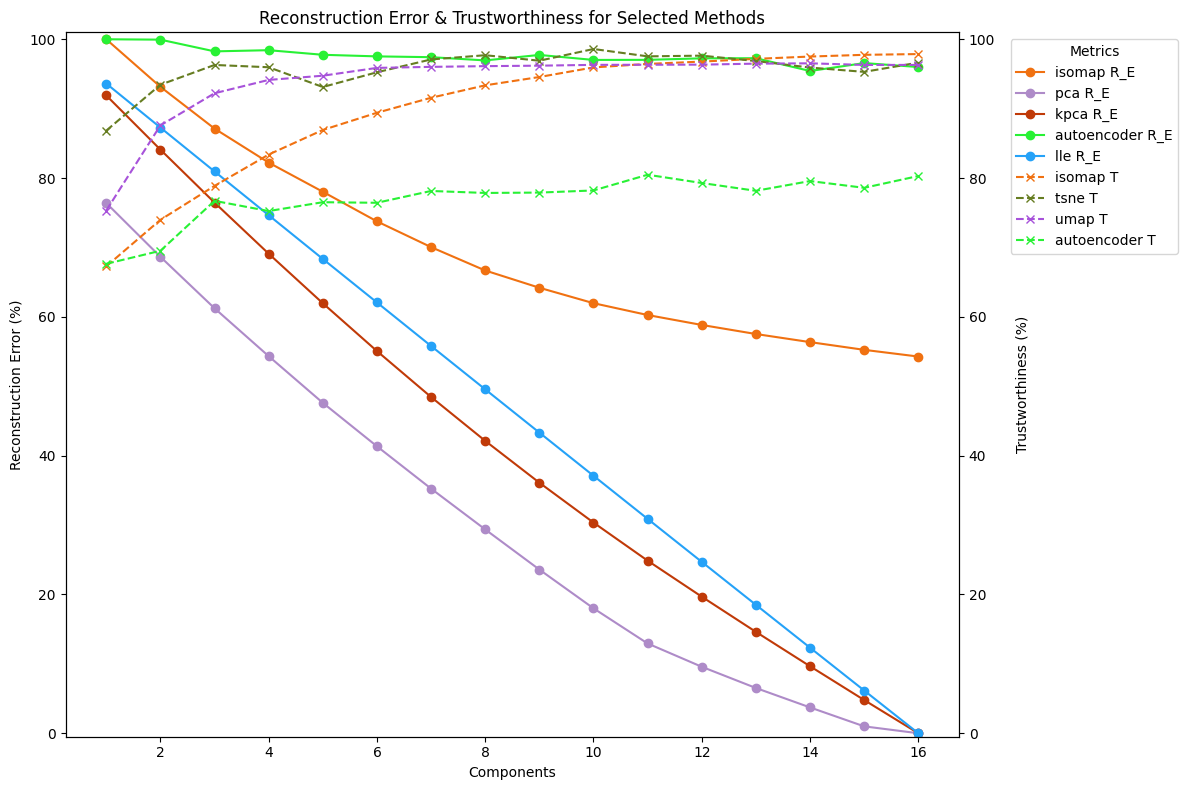

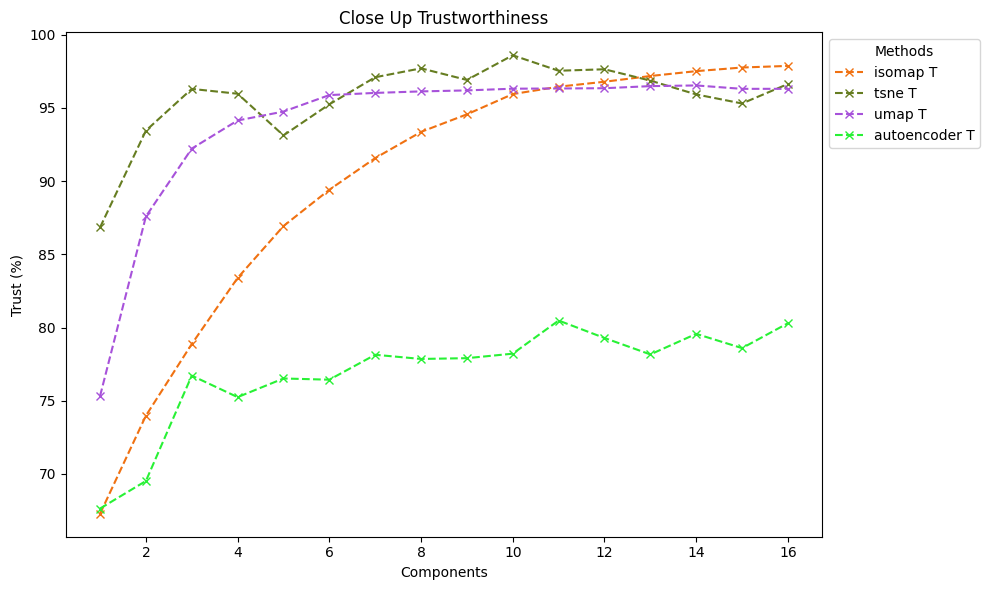

| Method      | Opt. Trustworthiness Components   | Max Trustworthiness   | Opt. Error Components   | Min R. Error            |         time |
|-------------|-----------------------------------|-----------------------|-------------------------|-------------------------|--------------|
| isomap      | 16                                | 97.86869918699188     | 16                      | 54.280426025390625      |   2.37275    |
| pca         | -                                 | -                     | 16                      | 1.7881393432617188e-05  |   0.00613403 |
| tsne        | 10                                | 98.59634146341463     | -                       | -                       | 136.543      |
| umap        | 14                                | 96.53495934959349     | -                       | -                       |  22.9687     |
| kpca        | -                                 | -                     | 16                      | -1.1920928955078125e-05 |   0.609943   |

c:\Users\darianz\Documents\DimensionalityReductionMethods\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\darianz\Documents\DimensionalityReductionMethods\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preex

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


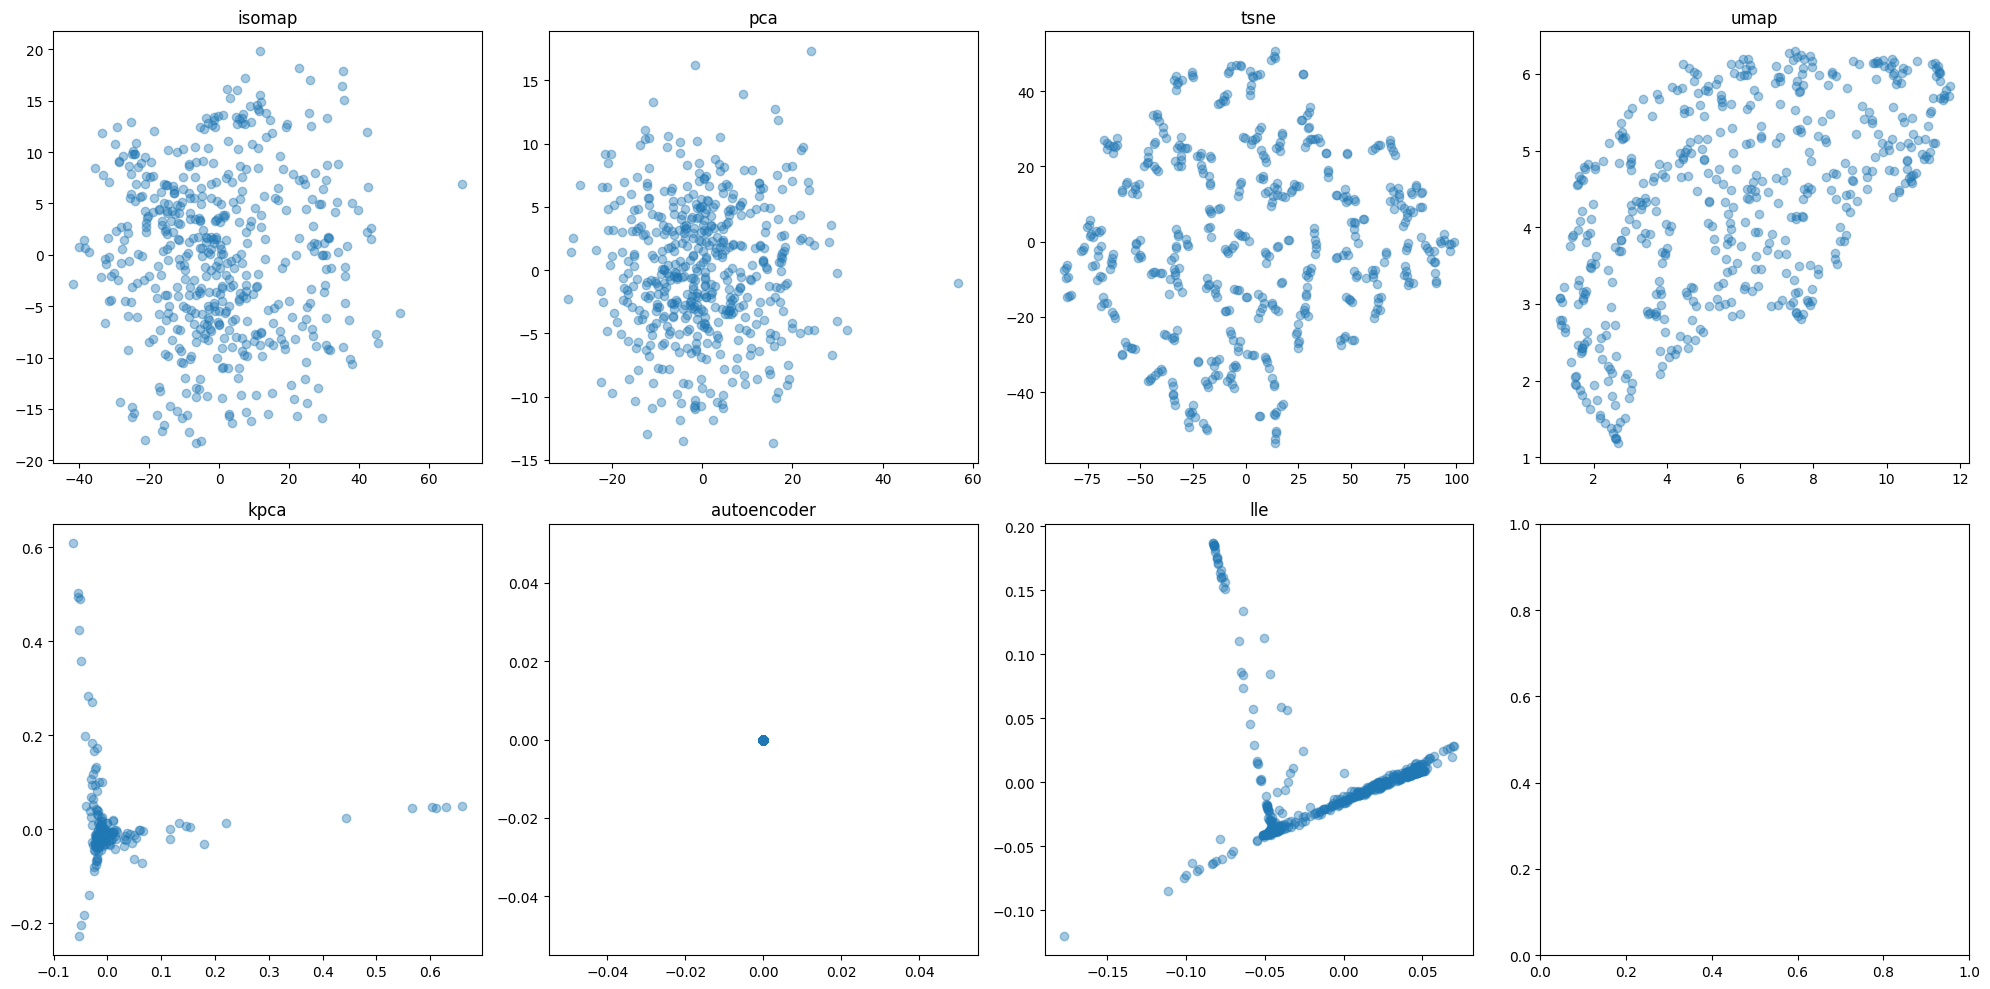

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


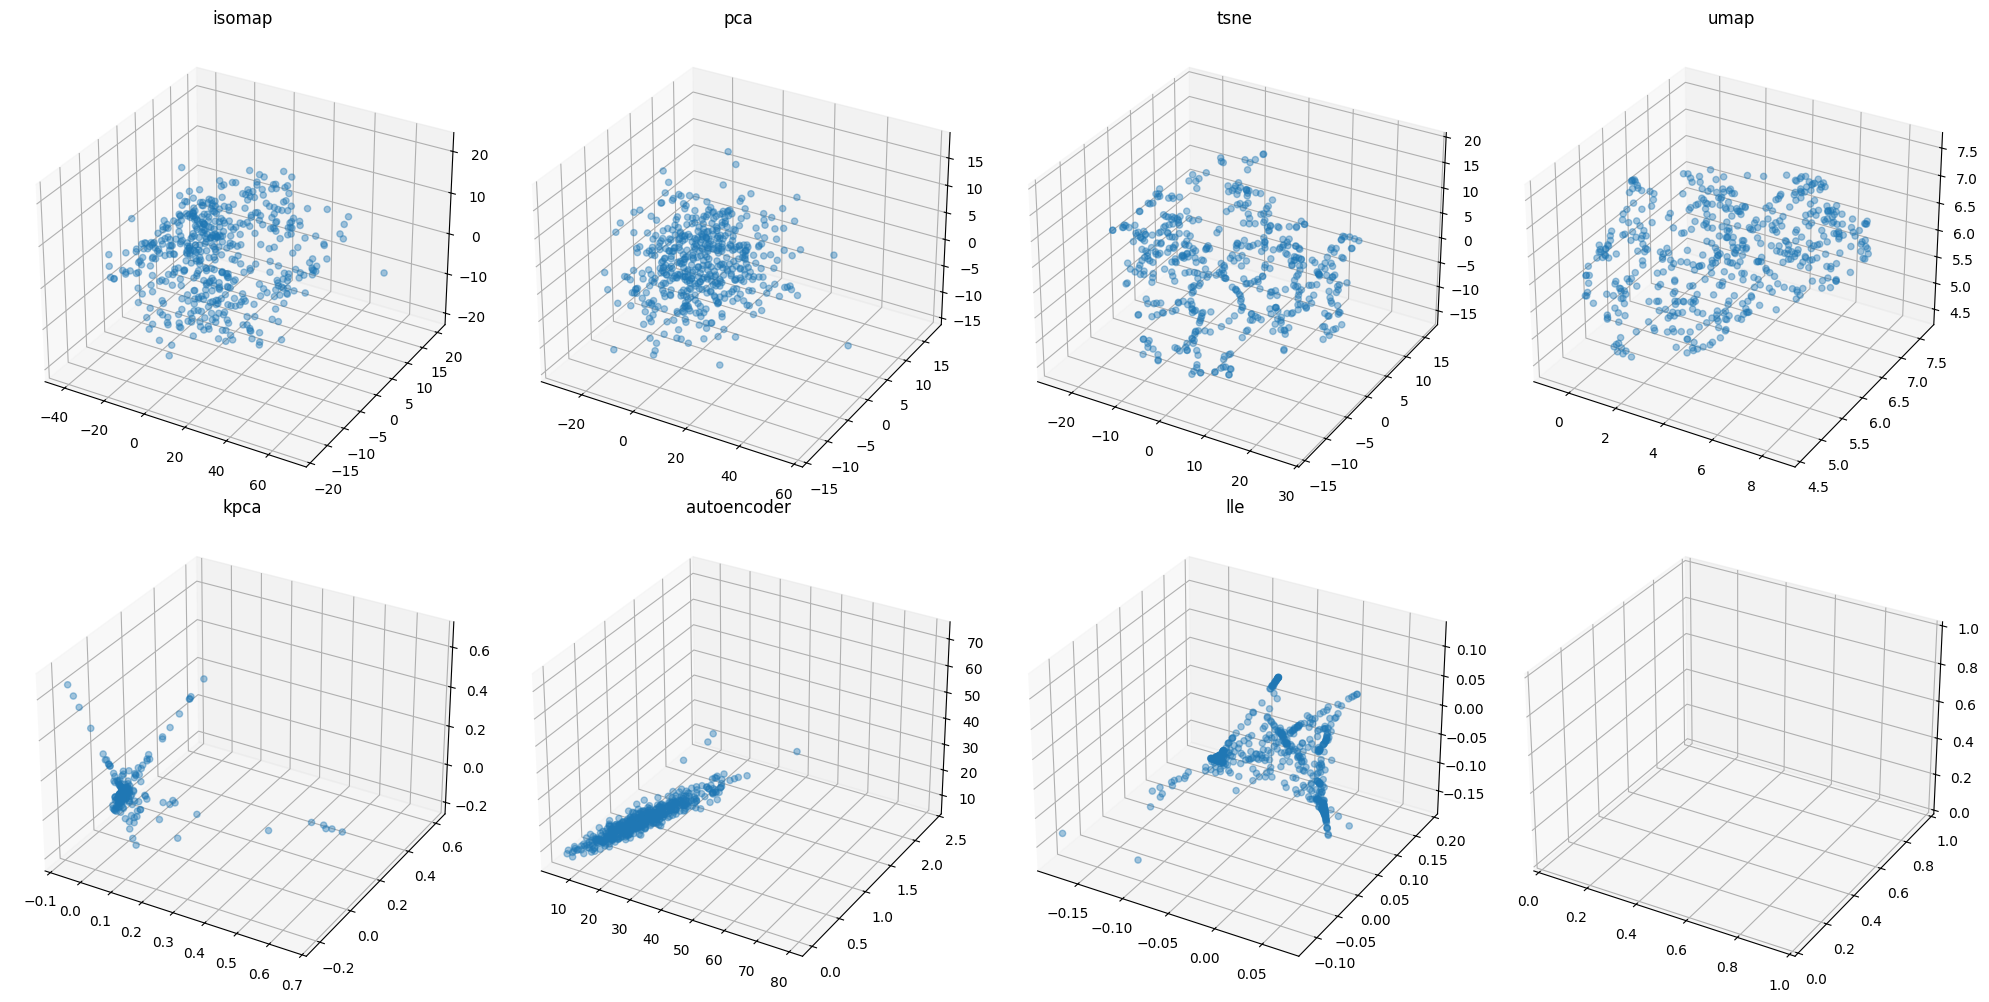

In [ ]:
x, y = generate_polynomial_data(n_samples=500, input_dim=10, output_dim=5, max_degree=5)

y = add_noise(y)
x = add_noise_column(x)
combined_data = np.hstack((x, y))

drh = drm.DimensionalityReductionHandler(combined_data)
drh.analyze_dimensionality_reduction(
    [
        "isomap",
        "PCA",
        "Tsne",
        "Umap",
        "kpca",
        "autoencoder",
        "lle",
    ]
)
drh.plot_results()
drh.table()
drh.visualization()
drh.visualization(plot_in_3d=True)